In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [67]:
orders = pd.read_csv('../data/raw/olist_orders_dataset.csv')
order_items = pd.read_csv('../data/raw/olist_order_items_dataset.csv')
customers = pd.read_csv('../data/raw/olist_customers_dataset.csv')


In [68]:
df = orders.merge(order_items, on='order_id', how='inner')
df = df.merge(customers, on='customer_id', how='inner')

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [69]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [70]:
df = df[df['order_delivered_customer_date'].notnull()].copy()

In [71]:
df['order_status'].unique()

array(['delivered', 'canceled'], dtype=object)

In [72]:
df = df[df['order_status'] == 'delivered']

In [73]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110189 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110189 non-null  object 
 1   customer_id                    110189 non-null  object 
 2   order_status                   110189 non-null  object 
 3   order_purchase_timestamp       110189 non-null  object 
 4   order_approved_at              110174 non-null  object 
 5   order_delivered_carrier_date   110188 non-null  object 
 6   order_delivered_customer_date  110189 non-null  object 
 7   order_estimated_delivery_date  110189 non-null  object 
 8   order_item_id                  110189 non-null  int64  
 9   product_id                     110189 non-null  object 
 10  seller_id                      110189 non-null  object 
 11  shipping_limit_date            110189 non-null  object 
 12  price                          1101

In [74]:
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'shipping_limit_date'
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [75]:
df['dias_entrega'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

Text(0.5, 1.0, 'Distribucion de dias de entrega')

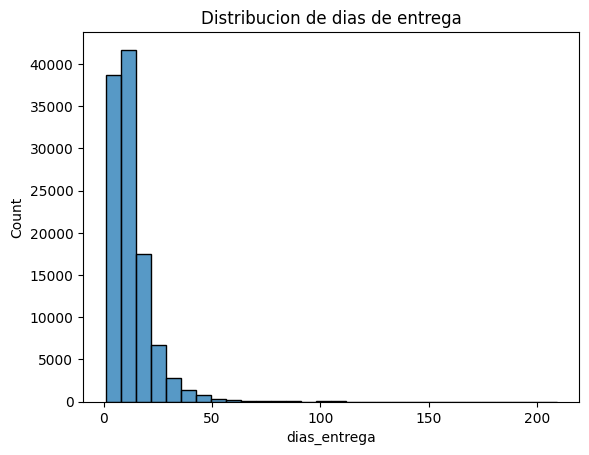

In [76]:
df = df[df['dias_entrega'] > 0]
sns.histplot(df['dias_entrega'], bins=30)
plt.title("Distribucion de dias de entrega")

In [77]:
df = df.copy()
df['dias_estimados'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days


In [79]:
X = df[['price', 'freight_value', 'dias_estimados', 'customer_state', 'seller_id']]
y = df['dias_entrega']

In [80]:
X = X.copy()

le_state = LabelEncoder()
le_seller = LabelEncoder()

X['customer_state'] = le_state.fit_transform(X['customer_state'])
X['seller_id'] = le_seller.fit_transform(X['seller_id'])

In [81]:
scaler = StandardScaler()
X[['price', 'freight_value', 'dias_estimados']] = scaler.fit_transform(X[['price', 'freight_value', 'dias_estimados']])

In [82]:
X.dtypes

price             float64
freight_value     float64
dias_estimados    float64
customer_state      int64
seller_id           int64
dtype: object

In [83]:
X_encoded = X.copy()
le_state = LabelEncoder()
le_seller = LabelEncoder()

# Aplicar codificación
X_encoded['customer_state'] = le_state.fit_transform(X_encoded['customer_state'])
X_encoded['seller_id'] = le_seller.fit_transform(X_encoded['seller_id'])

In [84]:

X_encoded.dtypes

price             float64
freight_value     float64
dias_estimados    float64
customer_state      int64
seller_id           int64
dtype: object

In [89]:
# Preparar X e y
y = df['dias_entrega'].astype(float)

X = df[['price', 'freight_value', 'dias_estimados', 'customer_state', 'seller_id']].copy()

# Definir columnas numéricas y categóricas
numeric_cols = ['price', 'freight_value', 'dias_estimados']
categorical_cols = ['customer_state', 'seller_id']

# Split primero para evitar data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rellenar NA en categóricas con una etiqueta 'missing' y asegurar tipo str
for col in categorical_cols:
    X_train[col] = X_train[col].fillna('missing').astype(str)
    X_test[col] = X_test[col].fillna('missing').astype(str)

# Usar LabelEncoder (ajustado solo en X_train) y mapear categorías desconocidas en test a -1
from sklearn.preprocessing import LabelEncoder

le_state = LabelEncoder()
le_seller = LabelEncoder()

le_state.fit(X_train['customer_state'])
le_seller.fit(X_train['seller_id'])

state_map = {cls: idx for idx, cls in enumerate(le_state.classes_)}
seller_map = {cls: idx for idx, cls in enumerate(le_seller.classes_)}

# Transformar columnas categóricas en arrays 2D
X_train_cat = np.column_stack([
    X_train['customer_state'].map(lambda x: state_map.get(x, -1)).astype(int),
    X_train['seller_id'].map(lambda x: seller_map.get(x, -1)).astype(int)
])

X_test_cat = np.column_stack([
    X_test['customer_state'].map(lambda x: state_map.get(x, -1)).astype(int),
    X_test['seller_id'].map(lambda x: seller_map.get(x, -1)).astype(int)
])

# Escalar columnas numéricas
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_cols])
X_test_num = scaler.transform(X_test[numeric_cols])

# Concatenar numéricas + categóricas (ahora con 2 columnas categóricas codificadas)
X_train = np.hstack([X_train_num, X_train_cat])
X_test = np.hstack([X_test_num, X_test_cat])

# Ahora X_train y X_test son matrices numéricas (numpy arrays) listas para .fit()

In [91]:
# Instanciar modelos
model_lr = LinearRegression()
model_rf = RandomForestRegressor(random_state=42)
model_gb = GradientBoostingRegressor(random_state=42)

# Entrenar (usar X_train transformado)
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_gb.fit(X_train, y_train)

# Evaluación rápida: predicciones y métricas básicas
for name, model in [('LinearRegression', model_lr), 
                    ('RandomForest', model_rf), 
                    ('GradientBoosting', model_gb)]:
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))  # cálculo manual
    r2 = r2_score(y_test, preds)
    
    print(name)
    print(' MAE :', mae)
    print(' RMSE:', rmse)
    print(' R2  :', r2)
    print('-----')

LinearRegression
 MAE : 5.375514722858312
 RMSE: 8.715795017964464
 R2  : 0.17609661575356284
-----
RandomForest
 MAE : 4.754921981193283
 RMSE: 8.178821561473193
 R2  : 0.2744894406557653
-----
GradientBoosting
 MAE : 5.091131478583047
 RMSE: 8.393371601155044
 R2  : 0.23592643668093471
-----
RandomForest
 MAE : 4.754921981193283
 RMSE: 8.178821561473193
 R2  : 0.2744894406557653
-----
GradientBoosting
 MAE : 5.091131478583047
 RMSE: 8.393371601155044
 R2  : 0.23592643668093471
-----


In [92]:
# Feature temporal: día de la semana y mes de compra
df['purchase_dayofweek'] = df['order_purchase_timestamp'].dt.dayofweek
df['purchase_month'] = df['order_purchase_timestamp'].dt.month

# Feature: días estimados para entrega
df['dias_estimados'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days

# Nota: Distancia geográfica simplificada como diferencia de códigos postales
df['zip_diff'] = abs(df['customer_zip_code_prefix'] - df['customer_zip_code_prefix'].mean())

In [93]:
# Seleccionar features
features = ['price', 'freight_value', 'dias_estimados', 'customer_state', 'seller_id', 
            'purchase_dayofweek', 'purchase_month', 'zip_diff']
X = df[features].copy()
y = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

# Codificación simple de variables categóricas
le_state = LabelEncoder()
le_seller = LabelEncoder()
X['customer_state'] = le_state.fit_transform(X['customer_state'])
X['seller_id'] = le_seller.fit_transform(X['seller_id'])

In [94]:
# Dividir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar modelos
model_lr = LinearRegression()
model_rf = RandomForestRegressor(random_state=42)
model_gb = GradientBoostingRegressor(random_state=42)

# Entrenar
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_gb.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


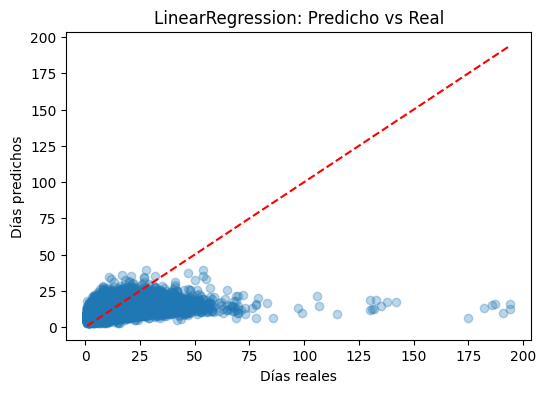

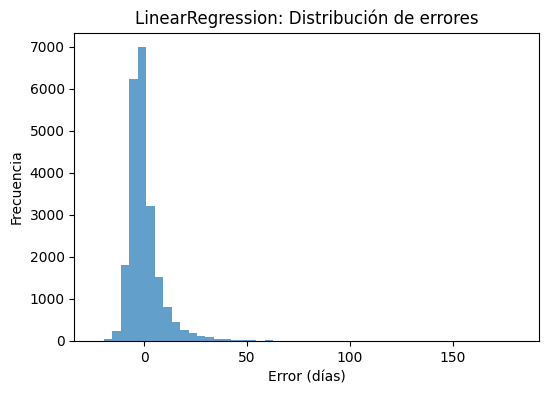

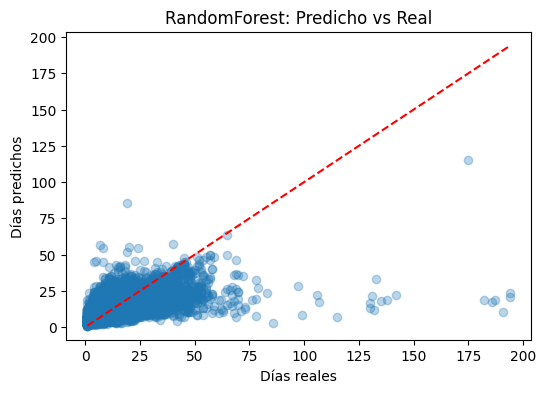

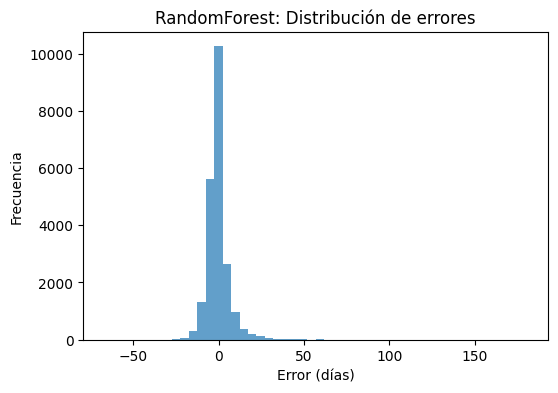

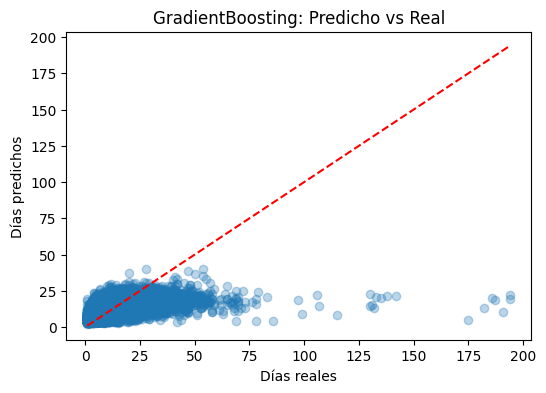

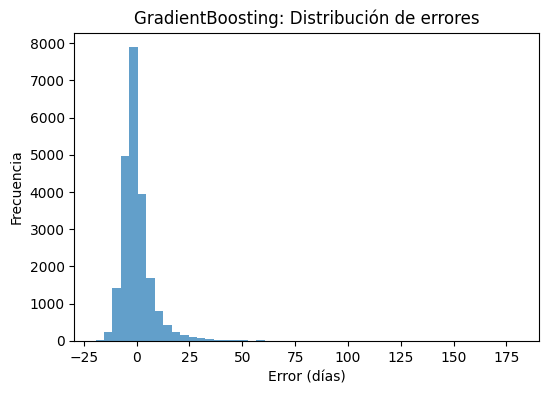

,Modelo,MAE,RMSE,R2
0,LinearRegression,5.365238,8.704604,0.178211
1,RandomForest,4.343352,7.601969,0.373221
2,GradientBoosting,4.870814,8.090423,0.290088


In [95]:
results = []

for name, model in [('LinearRegression', model_lr), 
                    ('RandomForest', model_rf), 
                    ('GradientBoosting', model_gb)]:
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    
    results.append({'Modelo': name, 'MAE': mae, 'RMSE': rmse, 'R2': r2})
    
    # Visualización: scatter plot de predicciones vs reales
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, preds, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Días reales')
    plt.ylabel('Días predichos')
    plt.title(f'{name}: Predicho vs Real')
    plt.show()
    
    # Histograma de errores
    errores = y_test - preds
    plt.figure(figsize=(6,4))
    plt.hist(errores, bins=50, alpha=0.7)
    plt.title(f'{name}: Distribución de errores')
    plt.xlabel('Error (días)')
    plt.ylabel('Frecuencia')
    plt.show()


pd.DataFrame(results)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(rf, param_grid, n_iter=10, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42)
rf_random.fit(X_train, y_train)

# Mejor modelo y métricas
best_rf = rf_random.best_estimator_
preds = best_rf.predict(X_test)
print('RandomForest Optimizado')
print('MAE:', mean_absolute_error(y_test, preds))
print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))
print('R2:', r2_score(y_test, preds))